# Web scraping, text analysis, and networks can help us identify the most important Avenger

## PyConNA 2021

In [1]:
import requests

from bs4 import BeautifulSoup

from html.parser import HTMLParser

import matplotlib.pyplot as plt

import pandas as pd
import itertools

In [2]:
import matplotlib

In [3]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

**Urls for transcripts** found at https://www.fandom.com. 

In [50]:
urls = ["https://transcripts.fandom.com/wiki/The_Avengers", 
        "https://transcripts.fandom.com/wiki/Avengers:_Age_of_Ultron",
        "https://transcripts.fandom.com/wiki/Avengers:_Infinity_War",
        "https://transcripts.fandom.com/wiki/Avengers:_Endgame"]

**Request and collect the html**

In [51]:
results = []
for url in urls:
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    
    results.append(soup.find(id='mw-content-text'))

In [52]:
len(results)

4

In [53]:
for result in results:
    print("Number of paragraphs:", len(result.find_all('p')))

Number of paragraphs: 1555
Number of paragraphs: 1108
Number of paragraphs: 1423
Number of paragraphs: 1619


In [54]:
results[3]

<div class="mw-content-ltr" dir="ltr" id="mw-content-text" lang="en"><!-- Google Tag Manager (noscript) -->
<noscript><iframe height="0" src="https://www.googletagmanager.com/ns.html?id=GTM-N6XD44P" style="display:none;visibility:hidden" width="0"></iframe></noscript>
<!-- End Google Tag Manager (noscript) -->
<div class="mw-parser-output"><div class="center"><div class="floatnone"><a class="image" href="https://static.wikia.nocookie.net/transcripts/images/0/0d/Avengers_Endgame_poster.jpg/revision/latest?cb=20190510235553"><img alt="Avengers Endgame poster.jpg" data-image-key="Avengers_Endgame_poster.jpg" data-image-name="Avengers Endgame poster.jpg" decoding="async" height="326" src="https://static.wikia.nocookie.net/transcripts/images/0/0d/Avengers_Endgame_poster.jpg/revision/latest/scale-to-width-down/220?cb=20190510235553" width="220"/></a></div></div>
<table style="width:65%; margin:20px auto 10px auto; border:1px solid #AAA; background: #f9f9f9; text-align:center;">
<tbody><tr>
<

In [10]:
texts = [paragraph.get_text() for result in results for paragraph in result.find_all('p')]

In [11]:
texts[200]

"FURY:\xa0 Our intelligence says, Thor is not a hostile. But he's worlds away, we can't depend on him to help. It's up to us.\n"

**The speakers**

In [12]:
def basic_clean_of_names(name):
    return name.split(" (")[0].split(" *")[0].title()

In [13]:
speakers = {}

for text in texts:
    if ':' in text and text[0]!='[':
        raw_speaker = text[:text.find(':')]
        speaker = basic_clean_of_names(raw_speaker)
        
        if speaker in speakers:
            speakers[speaker] += 1
        else:
            speakers[speaker] = 1

In [14]:
len(speakers)

180

In [15]:
speakers

{'Cut To': 1,
 'The Other': 9,
 'Loki': 86,
 'Nick Fury': 99,
 'Agent Phil Coulson': 15,
 'Coulson': 31,
 'Fury': 52,
 'Agent Maria Hill': 16,
 'Hill': 8,
 'Dr. Erik Selvig': 1,
 'Selvig': 14,
 'Clint Barton': 139,
 'Nasa Sciencetist': 1,
 'Clint': 10,
 'General Luchkov': 1,
 'Natasha Romanoff': 166,
 'Luchkov': 5,
 'Natasha': 76,
 'Weasely Thug': 1,
 'Attending Woman': 1,
 'Little Girl': 3,
 'Bruce': 32,
 'Banner': 51,
 'Council Member 1': 6,
 'Council Member 2': 2,
 'Steve': 81,
 'Peggy Carter': 4,
 'Shield Sciencetist': 2,
 'Tony': 132,
 'Pepper Potts': 38,
 'Pepper': 25,
 'Jarvis': 35,
 'Pilot': 2,
 'Agent Jasper Sitwell': 4,
 'Sitwell': 7,
 'Elder German Man': 2,
 'Captain America': 42,
 'Iron Man': 26,
 'Thor': 282,
 'Tony\xa0': 1,
 'Shield Base Voice': 1,
 'Barton': 3,
 'Outside The Helicarrier': 1,
 'Galaga Player': 1,
 'Helmsman': 2,
 'Escort 0-6 Pilot': 1,
 'Escort 606 Pilot': 2,
 'Shield Agent': 1,
 'Security Guard': 8,
 'Young Shield Pilot': 1,
 'Black Widow': 20,
 'Hawkeye

In [16]:
names_lookup = {
'Loki': ['Loki (V.O.)'],
'General Luchkov': ['Luchkov'],
'Nick Fury': ["Fury",],
'Dr. Erik Selvig': ['Selvig'],
'Clint Barton': ['Clint', 'Barton', 'Hawkeye'],
'Ebony Maw': ['Maw', "Ebony Maw's"],
'Stephen Strange': ['Strange', 'Dr Strange', 'Doctor Strange', "Doctor Strange's", 'Doc'],
'Bruce Banner': ['Hulk',  'Banner',  'Bruce', 'Bruce Banner *Out Of Breath*'], 
'Tony Stark': ["Iron Man's", 'Iron Man',
               'Stark', 'Tony', 'Tony\xa0', 'Tony Stark(2012)', '2008 Tony Stark',
               'Stark\n', 'Iron Man]'], 
'Pepper Potts': ['Pepper', 'Potts'], 
'Peter Parker': ['Spiderman', 'Iron Spider', 'Peter'],
'School Bus Driver, Stan Lee': [], 
'Cull Obsidian': ["Cull Obsidian's"], 
'Peter Quill': ['Quill', 'Star Lord'], 
'Gamora': ['Young Gamora', 'Memory Gamora', ], 
'Wanda Maximoff': ['\xa0Wanda Maximoff', 'Wanda', 'Scarlet', ' Wanda Maximoff'], 
'Corvus Glaive': ['Corvus', "Corvus Glaive's", 'Glaive'], 
'Natasha Romanoff': ['Natasha', 'Black Widow', 'Nat'], 
'Sam Wilson': ['Sam'], 
'Steve Rogers': ['Captain America', 'Steve', 'Cap', '(Old) Steve Rogers'], 
'Collector': [], 
'Secretary Ross': [], 
'James Rhodes': ['Rhodey', 'War machine'], 
'Okoye': [], 
"T'Challa": ["King T'Challa"], 
'Bucky Barnes': ['Winter Soldier', 'Bucky'], 
'Eitri': [], 
'Nebula': ['Memory Nebula'], 
'Stonekeeper': [], 
'Red Skull': [], 
'Shuri': [], 
'Jabari Warriors': ['Jabari'],
"M'Baku": [],
'Dome Control': [],
'Maria Hill': ['Hill'],
'Dora Milaje': ['Dora'],
'Captain Marvel': [],
'Kingsguard': [],
'Scott Lang': ['Scott', 'Antman', 'Ant man', 'Teen Scott Lang', 'Old Scott Lang'],
'Infinity stones': ['Tesseract', 
                    'Mind Stone',
                    'Stone', 
                    'Space Stone',
                    'Soul Stone',
                    'Reality Stone',
                    'Time Stone',
                    'Power Stone']
}

In [17]:
reverse_lookup = {}
for k,v in names_lookup.items():
    for x in v:
        reverse_lookup.setdefault(x,[]).append(k)

In [18]:
speakers_df = pd.DataFrame(speakers.items(), columns=['character', 'speaking time'])

In [19]:
speakers_df = speakers_df.replace(reverse_lookup)

In [20]:
grouped_by_character = speakers_df.groupby('character').sum().nlargest(15, 'speaking time')

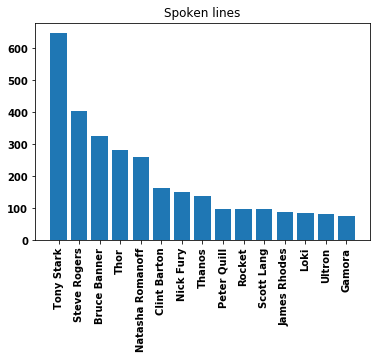

In [21]:
fig, axes = plt.subplots()

axes.bar(grouped_by_character.index, 
         grouped_by_character.unstack().values);

axes.set_xticklabels(grouped_by_character.index, rotation=90);

axes.set_title("Spoken lines", );


**Mentions**

In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")

def identify_names(text):

    doc = nlp(text)   
    names = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    stones = [word.text for word in doc if word.text in names_lookup['Infinity stones']]

    return names + stones

In [23]:
mentions = []

for text in texts:
    if ':' in text and text[0]!='[':
        mentioned = identify_names(text[text.find(':'):])
        if mentioned:
            for raw_person in mentioned:
                person = basic_clean_of_names(raw_person)
                mentions.append(person)

        else:
            pass

In [24]:
df_mentions = pd.DataFrame(mentions, columns=['character'])

In [25]:
df_mentions = df_mentions.replace(reverse_lookup)

In [26]:
mentions_by_character = df_mentions[df_mentions['character'] != "Infinity stones"]['character'].value_counts()


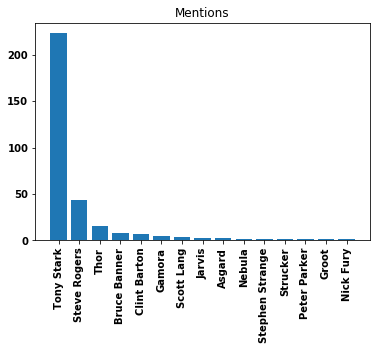

In [27]:
fig, axes = plt.subplots()

axes.bar(mentions_by_character.index[:15],
        mentions_by_character.value_counts().values[:15]);


axes.set_xticklabels(mentions_by_character.index, rotation=90);

axes.set_title("Mentions", );

**Interactions**

In [28]:
def clean_name(name, reverse_lookup):
    name = basic_clean_of_names(name)
    try: 
        clean_name = reverse_lookup[name] 
        return clean_name[0]
    except:
        return name

In [29]:
connections = {}

for text in texts:
    if ':' in text and text[0]!='[':
        raw_speaker = [text[:text.find(':')]][0]
        speaker = clean_name(raw_speaker, reverse_lookup)

        if speaker:
            connected = identify_names(text[text.find(':'):])

            if connected: 
                if speaker in connections:
                    for connection in connected:
                        connections[speaker].append(clean_name(connection, reverse_lookup))
                else:
                    connections[speaker] = [clean_name(connection, reverse_lookup) for connection in connected] 

        else:
            pass

In [30]:
def count_m(list_of_mentions, counted={}):
    for mention in list_of_mentions:
        if mention in counted:
            counted[mention] += 1
        else:
            counted[mention] = 1
    return counted

In [31]:
connections

{'Coulson': ['Dr. Erik Selvig',
  'Infinity stones',
  'Infinity stones',
  'Nick Fury',
  'Clint Barton',
  'Tony Stark',
  'Tony Stark',
  'Tony Stark',
  'Erskine',
  'Stephen Hawking',
  'Steve Rogers',
  'Steve Rogers',
  'Coulson',
  'Steve Rogers',
  'Coulson',
  'Steve Rogers',
  'Coulson',
  'Romanoff',
  'Captain Rogers',
  'Coulson',
  'Steve Rogers',
  'Helicarrier'],
 'Maria Hill': ['Infinity stones',
  'Infinity stones',
  'Roger',
  'Lab',
  'Sokovia',
  'Steve Rogers',
  'Strucker',
  'Jane',
  'Maria',
  'Testosterone',
  'Steve Rogers',
  'Bruce Banner',
  'Altitude',
  'Helicarrier',
  'Nick'],
 'Dr. Erik Selvig': ['Infinity stones',
  'Infinity stones',
  'Infinity stones',
  'Infinity stones',
  'Thor',
  'Clint Barton',
  'Sees Loki',
  'Infinity stones',
  'Infinity stones',
  'Infinity stones',
  'Infinity stones'],
 'Nick Fury': ['Clint Barton',
  'Clint Barton',
  'Odin',
  'Maria Hill',
  'Clint Barton',
  'Infinity stones',
  'Infinity stones',
  'Maria Hill

In [32]:
for key, value in connections.items():
    connections[key] = count_m(value, {})

In [33]:
connections

{'Coulson': {'Dr. Erik Selvig': 1,
  'Infinity stones': 2,
  'Nick Fury': 1,
  'Clint Barton': 1,
  'Tony Stark': 3,
  'Erskine': 1,
  'Stephen Hawking': 1,
  'Steve Rogers': 5,
  'Coulson': 4,
  'Romanoff': 1,
  'Captain Rogers': 1,
  'Helicarrier': 1},
 'Maria Hill': {'Infinity stones': 2,
  'Roger': 1,
  'Lab': 1,
  'Sokovia': 1,
  'Steve Rogers': 2,
  'Strucker': 1,
  'Jane': 1,
  'Maria': 1,
  'Testosterone': 1,
  'Bruce Banner': 1,
  'Altitude': 1,
  'Helicarrier': 1,
  'Nick': 1},
 'Dr. Erik Selvig': {'Infinity stones': 8,
  'Thor': 1,
  'Clint Barton': 1,
  'Sees Loki': 1},
 'Nick Fury': {'Clint Barton': 4,
  'Odin': 1,
  'Maria Hill': 6,
  'Infinity stones': 20,
  'Coulson': 3,
  'Councilman': 2,
  'Asgard': 1,
  'Thor': 2,
  'Steve Rogers': 3,
  'Howard Stark': 1,
  'Gentlemen': 1,
  'Nick Fury': 1,
  'Bruce Banner': 7,
  'Romanoff': 4,
  'Tony Stark': 7,
  "Phil Coulson'S": 1,
  'Phil Coulson': 1,
  'Maximoff': 1,
  'Guy': 1,
  'Glad': 1,
  'Helicarrier': 1,
  'Nice': 1,
  '

**Connected with the stones**

In [34]:
with_stones = []

for key, value in connections.items():
    for interaction, v in connections[key].items():
        if interaction == 'Infinity stones':
            with_stones.append((key, v))
                                

In [35]:
with_stones = sorted(with_stones, key=lambda x: x[1], reverse=True) 

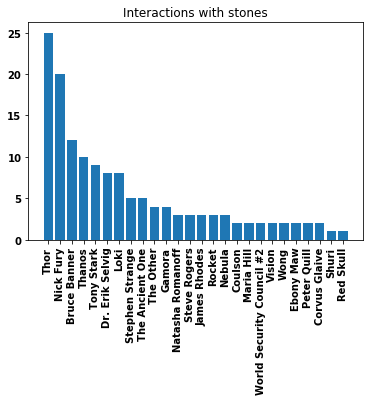

In [36]:
fig, axes = plt.subplots()

axes.bar([v[0] for v in with_stones],
         [v[1] for v in with_stones]);
 

axes.set_xticklabels([v[0] for v in with_stones], rotation=90);

axes.set_title("Interactions with stones", );

**Network**

In [37]:
import networkx as nx

In [38]:
G = nx.MultiDiGraph()

In [39]:
for speaker, mentions in connections.items():
        for name, weight in mentions.items():            
            edge = (speaker, name, weight)
            G.add_weighted_edges_from([edge])

In [40]:
pos = nx.spring_layout(G)

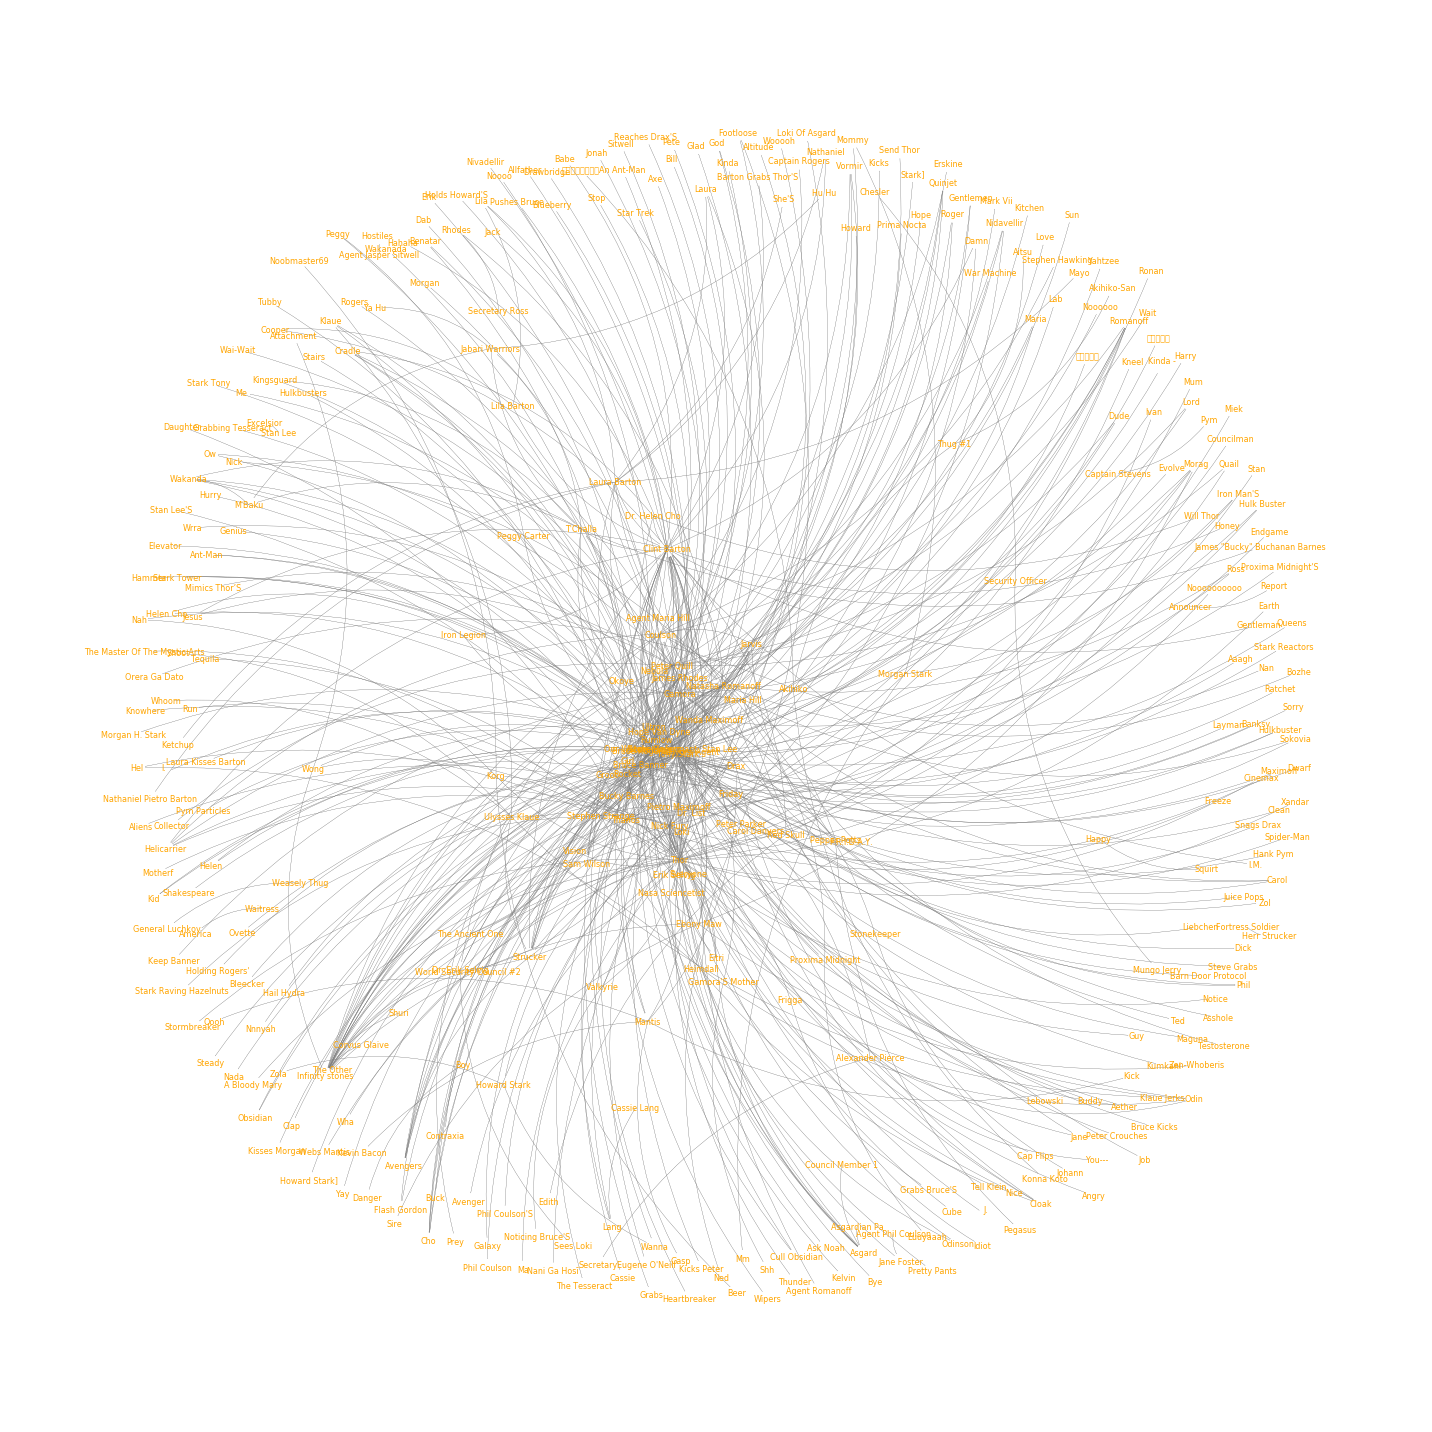

In [44]:
fig, axes = plt.subplots(figsize=(20, 20))

nx.draw_networkx_edges(G, pos,
                          width=weight/4,
                          arrowsize=weight/4,
                          arrowstyle="Fancy, head_length=.8, head_width=.8, tail_width=.01",
                          connectionstyle='arc3,rad=0.2',
                          edge_color="gray",
                          alpha=0.75);

nx.draw_networkx_labels(G, pos, font_size=8, font_color='orange');

for ax in [axes.spines["right"], axes.spines["top"], axes.spines["left"], axes.spines["bottom"]]:
    ax.set_visible(False);
    
plt.tight_layout()

In [45]:
central_characters = sorted(nx.degree_centrality(G).items(),
                            key=lambda x:x[1], reverse=True)[0:15]

In [46]:
betweenness_weighted = sorted(nx.betweenness_centrality(G, weight='weight').items(),
                              key=lambda x:x[1], reverse=True)[0:15]

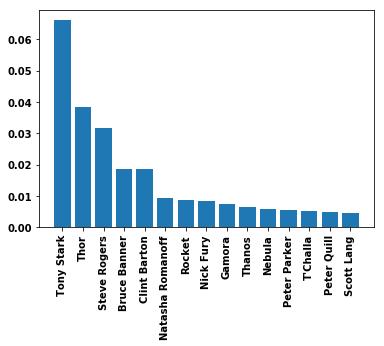

In [47]:
fig, axes = plt.subplots()

axes.bar([c[0] for c in betweenness_weighted], [c[1] for c in betweenness_weighted]);

axes.set_xticklabels([c[0] for c in betweenness_weighted], rotation=90);

In [48]:
page_rank_weighted = sorted(nx.pagerank_numpy(G, weight='weight').items(),
                            key=lambda x:x[1], reverse=True)[0:15]

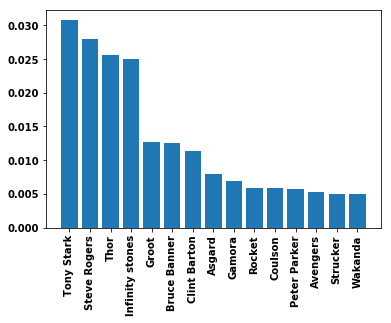

In [49]:
fig, axes = plt.subplots()

axes.bar([c[0] for c in page_rank_weighted], [c[1] for c in page_rank_weighted]);

axes.set_xticklabels([c[0] for c in page_rank_weighted], rotation=90);